# Evaluate model calibration using folktexts

**Prerequisite**: install folktexts package. Follw setup guide in the [README](https://github.com/socialfoundations/folktexts) or install it locally by navigating to the root folder of the reppository and running `>pip install -e .`

**Summary**: The script loads the gpt2 model from Huggingface and demonstrates how to use folktexts to get insights into model calibration, and plot the benchmark results. 

### 1. Check folktexts is installed

In [1]:
import folktexts
folktexts.__version__

/Users/cmendler/miniconda3/envs/folktexts2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'0.0.14'

### 2. Load Model from Huggingface

we use the gpt2 model for this demo. The workflow can similarly be applied to any model/tokenizer pair.

In [3]:
from folktexts.llm_utils import load_model_tokenizer

# Note: make sure you have the necessary persmissions on Huggingface to download the model
# Note: use gpt2 for the demo if you need a smaller model

hf_model_identifier = "meta-llama/Meta-Llama-3-8B"
# hf_model_identifier = "gpt2"
model, tokenizer = load_model_tokenizer(hf_model_identifier)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 4/4 [00:12<00:00,  3.17s/it]


### 3. Create default benchmarking tasks

We generate ACSINcome benchmark using folktexts. 

**NOTE:** We will subsample the reference data for faster runtime. This should be removed for obtaining reproducible reslts.


In [4]:
from folktexts.benchmark import CalibrationBenchmark

# Note: this argument is optional. Omit, or set to 1 for reproducible benchmarking on the full data
subsampling_ratio = 0.001

bench = CalibrationBenchmark.make_acs_benchmark(
    model= model,
    task_name="ACSIncome",
    tokenizer=tokenizer,
    subsampling = subsampling_ratio
)

Loading ACS data...


Computing risk estimates: 100%|██████████| 11/11 [05:19<00:00, 29.08s/it]
/Users/cmendler/miniconda3/envs/folktexts2/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


### 4. Run benchmark

Results will be saved in a folder RESULTS_DIR. There is 
* `.json` file contains evaluated metrics
* `.cvs` file contains risk scores of each datapoint
* folder called `imgs/` contains figures

In [ ]:
# Note: folder should exist
RESULTS_DIR = "res"
bench.run(results_root_dir = RESULTS_DIR)

### 4. Visualize results

We can also visualize the results inline:

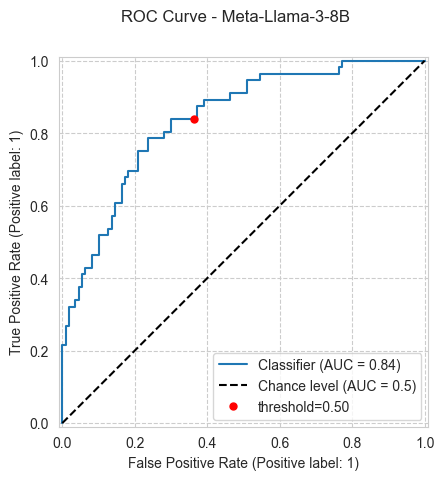

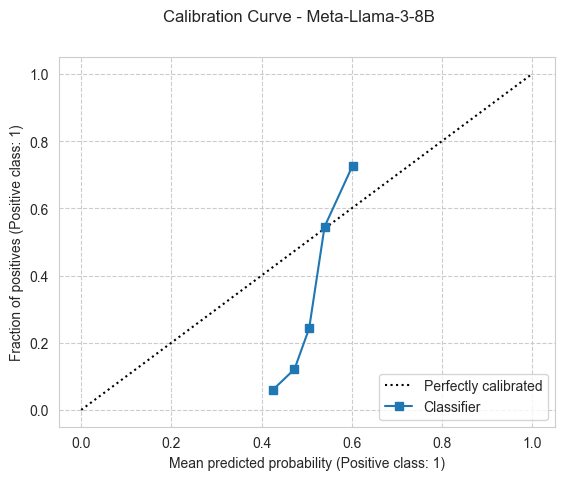

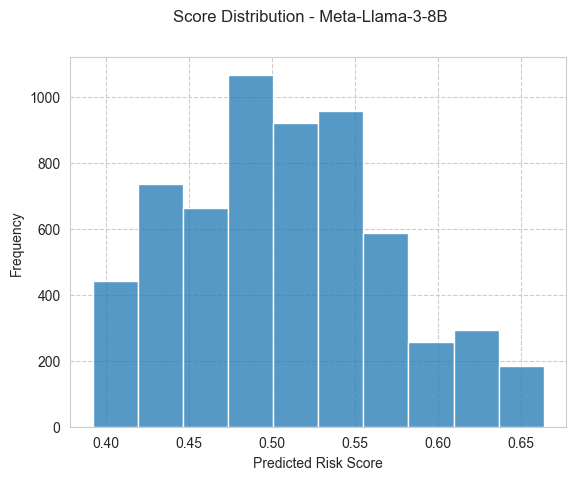

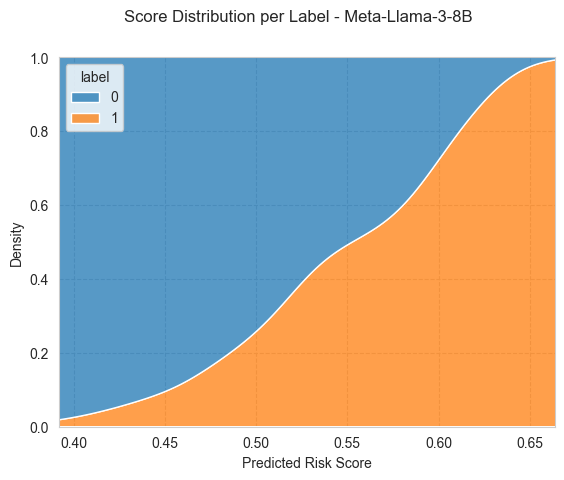

/Users/cmendler/miniconda3/envs/folktexts2/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


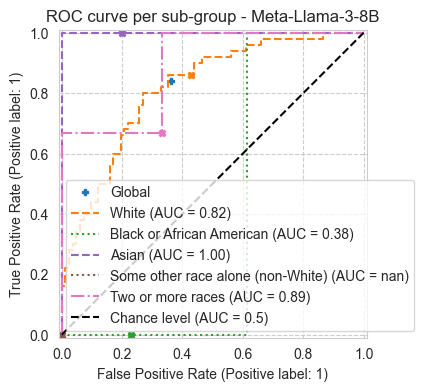

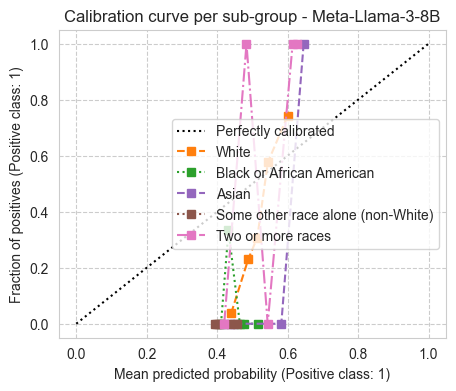

{'roc_curve_path': '/Users/cmendler/Documents/projects/folktexts/package-dev/folktexts/notebooks/res/Meta-Llama-3-8B_bench-1579557332/imgs/roc_curve.pdf',
 'calibration_curve_path': '/Users/cmendler/Documents/projects/folktexts/package-dev/folktexts/notebooks/res/Meta-Llama-3-8B_bench-1579557332/imgs/calibration_curve.pdf',
 'score_distribution_path': '/Users/cmendler/Documents/projects/folktexts/package-dev/folktexts/notebooks/res/Meta-Llama-3-8B_bench-1579557332/imgs/score_distribution.pdf',
 'score_distribution_per_label_path': '/Users/cmendler/Documents/projects/folktexts/package-dev/folktexts/notebooks/res/Meta-Llama-3-8B_bench-1579557332/imgs/score_distribution_per_label.pdf',
 'roc_curve_per_subgroup_path': '/Users/cmendler/Documents/projects/folktexts/package-dev/folktexts/notebooks/res/Meta-Llama-3-8B_bench-1579557332/imgs/roc_curve_per_subgroup.pdf',
 'calibration_curve_per_subgroup_path': '/Users/cmendler/Documents/projects/folktexts/package-dev/folktexts/notebooks/res/Meta-

In [5]:
bench.plot_results()

---